In [ ]:
import pandas as pd

# Load the data files
product_data = pd.read_csv("product.csv")
coupon_data = pd.read_csv("coupon.csv")
coupon_redempt_data = pd.read_csv("coupon_redempt.csv")

# Step 1: Merge product.csv and coupon.csv using 'PRODUCT_ID'
product_coupon_merge = pd.merge(product_data, coupon_data, on="PRODUCT_ID", how="inner")

# Step 2: Merge the result with coupon_redempt.csv using 'COUPON_UPC'
final_merge = pd.merge(product_coupon_merge, coupon_redempt_data, on="COUPON_UPC", how="inner")

# Display the first few rows of the final merged DataFrame
print("Final Merged Data:")
print(final_merge.head())

# Check for any missing data in the merged DataFrame
print("\nSummary of Missing Values:")
print(final_merge.isnull().sum())

# Optionally, save the merged DataFrame to a new CSV file
final_merge.to_csv("merged_product_coupon_redempt.csv", index=False)


Final Merged Data:
   PRODUCT_ID  MANUFACTURER DEPARTMENT     BRAND COMMODITY_DESC  \
0       25671             2    GROCERY  National       FRZN ICE   
1       25671             2    GROCERY  National       FRZN ICE   
2       25671             2    GROCERY  National       FRZN ICE   
3       25671             2    GROCERY  National       FRZN ICE   
4       25671             2    GROCERY  National       FRZN ICE   

    SUB_COMMODITY_DESC CURR_SIZE_OF_PRODUCT   COUPON_UPC  CAMPAIGN_x  \
0  ICE - CRUSHED/CUBED                22 LB  10000085427          13   
1  ICE - CRUSHED/CUBED                22 LB  10000085427          13   
2  ICE - CRUSHED/CUBED                22 LB  10000085427          13   
3  ICE - CRUSHED/CUBED                22 LB  10000085427          13   
4  ICE - CRUSHED/CUBED                22 LB  10000085427          13   

   household_key  DAY  CAMPAIGN_y  
0             13  543          13  
1            117  521          13  
2            243  521          13  
3

In [ ]:
import pandas as pd

# Load the data files
campaign_table = pd.read_csv("campaign_table.csv")
campaign_desc = pd.read_csv("campaign_desc.csv")

# Merge the two tables using 'CAMPAIGN' as the join key, dropping the duplicate 'DESCRIPTION' column
# Keeping 'DESCRIPTION' from campaign_desc
merged_data_campaign = pd.merge(campaign_table, campaign_desc, on="CAMPAIGN", how="inner").drop(columns=["DESCRIPTION_x"])

# Rename the retained 'DESCRIPTION' column for clarity (if needed)
merged_data_campaign.rename(columns={"DESCRIPTION_y": "DESCRIPTION"}, inplace=True)

# Display the first few rows of the merged dataset
print("Merged Campaign Data:")
print(merged_data_campaign.head())

# Check for any missing data in the merged dataframe
print("\nSummary of Missing Values:")
print(merged_data_campaign.isnull().sum())


Merged Campaign Data:
   household_key  CAMPAIGN DESCRIPTION  START_DAY  END_DAY
0             17        26       TypeA        224      264
1             27        26       TypeA        224      264
2            212        26       TypeA        224      264
3            208        26       TypeA        224      264
4            192        26       TypeA        224      264

Summary of Missing Values:
household_key    0
CAMPAIGN         0
DESCRIPTION      0
START_DAY        0
END_DAY          0
dtype: int64


In [ ]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('product.csv')

# Filter the rows where SUB_COMMODITY_DESC is one of the specified values
filtered_product = data[data['DEPARTMENT'].isin([ 'COSMETICS'])]

# Extract the PRODUCT_IDs
product_ids = filtered_product['PRODUCT_ID'].tolist()

# Load the data files
transaction_data = pd.read_csv("transaction_data.csv")
hh_demographics = pd.read_csv("hh_demographic.csv")

# Merge the two tables using 'household_key' as the join key
merged_data = pd.merge(transaction_data, hh_demographics, on="household_key", how="inner")

merged_data = merged_data[merged_data['PRODUCT_ID'].isin(product_ids)]

# Display the first few rows of the merged dataset
print("Merged Transaction and Household Demographics Data:")
print(merged_data.head())

# Check for any missing data in the merged dataframe
print("\nSummary of Missing Values:")
print(merged_data.isnull().sum())

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create a binary target variable 'coupon_applied'
merged_data['coupon_applied'] = ((merged_data['COUPON_DISC'] > 0) | (merged_data['COUPON_MATCH_DISC'] > 0)).astype(int)

# Select relevant features
features = ['QUANTITY', 'SALES_VALUE', 'RETAIL_DISC', 'WEEK_NO', 'classification_1',
            'classification_2', 'classification_3', 'HOMEOWNER_DESC', 'classification_5',
            'classification_4', 'KID_CATEGORY_DESC']



# Prepare the formula for the logistic regression model
# Prepare the formula for the logistic regression model
formula = 'coupon_applied ~ QUANTITY + SALES_VALUE + RETAIL_DISC + WEEK_NO + C(classification_1)'
# formula = 'coupon_applied ~ household_key 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
#        'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
#        'COUPON_DISC', 'COUPON_MATCH_DISC', 'classification_1',
#        'classification_2', 'classification_3', 'HOMEOWNER_DESC',
#        'classification_5', 'classification_4', 'KID_CATEGORY_DESC'

# Fit the logistic regression model using statsmodels
logit_model = smf.logit(formula, data=merged_data).fit()

# Print the summary of the model
print(logit_model.summary())

# Initialize and train a Random Forest model (optional for comparison)
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_rf = rf_model.predict(X_test)

# # Evaluate the Random Forest model
# print("Random Forest Classification Report:")
# print(classification_report(y_test, y_pred_rf))

# # Optional: Confusion Matrix for both models
# print("Logistic Regression Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print("Random Forest Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_rf))

# Optionally, save the merged dataset to a new CSV file
#merged_data.to_csv("merged_transaction_hh_demographics.csv", index=False)


Merged Transaction and Household Demographics Data:
      household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
405            2110  27021248054    4      978486         1         4.99   
1338           2110  27081551501    9      939247         1         3.89   
1823           2058  27115146531   12      897487         1         1.99   
1828           2058  27115146531   12     1131887         1         4.94   
2175            361  27115548145   11     1137808         1         2.67   

      STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
405        375         0.00        1705        1          0.0   
1338       375         0.00        1516        2          0.0   
1823       367         0.00        1200        2          0.0   
1828       367        -2.43        1200        2          0.0   
2175       443        -1.32        2044        2          0.0   

      COUPON_MATCH_DISC classification_1 classification_2 classification_3  \
405                 0.

<ipython-input-42-fb16058da50b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['coupon_applied'] = ((merged_data['COUPON_DISC'] > 0) | (merged_data['COUPON_MATCH_DISC'] > 0)).astype(int)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_mo

Answering the question which works better , mailer or display for our focal brand

In [ ]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('product.csv')

# Filter the rows where SUB_COMMODITY_DESC is one of the specified values
filtered_product = data[data['SUB_COMMODITY_DESC'].isin([ 'MAYBELLINE'])]

# Extract the PRODUCT_IDs
product_ids = filtered_product['PRODUCT_ID'].tolist()

# Display the result
print(product_ids)

# Read the CSV files
causal_data = pd.read_csv('causal_data.csv')
coupon_data = pd.read_csv('coupon.csv')
transaction_data = pd.read_csv('transaction_data.csv')

merged_data = pd.merge(
    causal_data,
    transaction_data,
    on=["PRODUCT_ID", "STORE_ID", "WEEK_NO"],
    how="inner"  # Use 'inner' to keep only matching rows
)

# Display the first few rows of the merged DataFrame
print("Merged Data:")
print(merged_data.head())

# Filter the dataframes
filtered_causal = causal_data[causal_data['PRODUCT_ID'].isin(product_ids)]
filtered_coupon = coupon_data[coupon_data['PRODUCT_ID'].isin(product_ids)]
filtered_transaction = transaction_data[transaction_data['PRODUCT_ID'].isin(product_ids)]

filtered_merged_data = merged_data[merged_data['PRODUCT_ID'].isin(product_ids)]

# Display the first few rows of each filtered dataframe
print("Filtered Product Data:")
print(filtered_product.head())

print("Filtered Causal Data:")
print(filtered_causal.head())

print("\nFiltered Coupon Data:")
print(filtered_coupon.head())

print("\nFiltered Coupon Data:")
print(filtered_merged_data.head())

# filtered_transaction['PRODUCT_ID'] = filtered_transaction['PRODUCT_ID'].astype(int)
# filtered_transaction['STORE_ID'] = filtered_transaction['STORE_ID'].astype(int)
# filtered_transaction['WEEK_NO'] = filtered_transaction['WEEK_NO'].astype(int)

print("\nFiltered Transaction Data:")
print(filtered_transaction.head())

focal_product_id = 54284
filtered_transaction_data = filtered_transaction[filtered_transaction["PRODUCT_ID"] == focal_product_id]

print(filtered_transaction_data)

[54284, 448902, 783480, 819405, 819686, 822631, 823487, 827134, 828009, 828561, 829673, 830546, 832218, 834430, 838349, 838446, 843018, 843231, 843635, 843989, 845563, 846363, 846850, 847034, 847577, 847993, 851377, 854899, 855231, 858598, 858687, 861922, 862912, 863284, 863706, 864514, 865598, 866236, 866433, 868547, 868807, 869414, 869422, 870637, 871090, 871856, 872612, 872796, 872915, 874008, 879144, 881370, 883850, 884973, 885422, 891612, 893982, 894080, 894466, 897396, 899266, 899650, 900327, 900357, 901618, 904302, 904303, 904875, 906402, 908718, 910929, 911036, 912041, 914399, 914545, 915383, 915800, 916441, 916712, 917858, 917963, 917968, 919849, 920051, 920808, 921199, 922668, 922801, 923552, 924623, 930941, 931219, 934662, 934739, 934923, 935501, 935611, 937281, 937956, 944544, 945669, 945858, 945878, 945902, 947362, 950861, 951795, 952137, 954132, 954273, 961497, 961786, 963046, 963319, 963843, 966989, 970138, 970628, 970759, 970908, 976179, 979140, 980722, 980853, 982220, 

In [ ]:
import pandas as pd

# Assuming filtered_causal and filtered_transaction are already loaded DataFrames
filtered_transaction['PRODUCT_ID'] = filtered_transaction['PRODUCT_ID'].astype(int)
filtered_transaction['STORE_ID'] = filtered_transaction['STORE_ID'].astype(int)
filtered_transaction['WEEK_NO'] = filtered_transaction['WEEK_NO'].astype(int)

matching_product_ids = filtered_causal['PRODUCT_ID'].isin(filtered_transaction['PRODUCT_ID'])

# Filter the rows in filtered_causal where product_id exists in filtered_transaction
filtered_matching_causal = filtered_causal[matching_product_ids]

# Display the matching product_ids and corresponding rows
print("Matching Product IDs and Rows from filtered_causal:")
print(filtered_matching_causal)

# Merge the two DataFrames on 'product_id', 'store_id', and 'week_no'
merged_data = pd.merge(
    filtered_causal,
    filtered_transaction,
    on=["STORE_ID"],
    how="inner"  # Use 'inner' to keep only matching rows
)

# Display the first few rows of the merged DataFrame
print("Merged Data:")
print(merged_data.head())

# Check for missing values in the merged DataFrame
print("\nSummary of Missing Values:")
print(merged_data.isnull().sum())

# Optionally, save the merged DataFrame to a new CSV file
#merged_data.to_csv("merged_causal_transaction.csv", index=False)


Matching Product IDs and Rows from filtered_causal:
Empty DataFrame
Columns: [PRODUCT_ID, STORE_ID, WEEK_NO, display, mailer]
Index: []
Merged Data:
Empty DataFrame
Columns: [PRODUCT_ID_x, STORE_ID, WEEK_NO_x, display, mailer, household_key, BASKET_ID, DAY, PRODUCT_ID_y, QUANTITY, SALES_VALUE, RETAIL_DISC, TRANS_TIME, WEEK_NO_y, COUPON_DISC, COUPON_MATCH_DISC]
Index: []

Summary of Missing Values:
PRODUCT_ID_x         0
STORE_ID             0
WEEK_NO_x            0
display              0
mailer               0
household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID_y         0
QUANTITY             0
SALES_VALUE          0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO_y            0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64


<ipython-input-44-a0a466b7ffd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transaction['PRODUCT_ID'] = filtered_transaction['PRODUCT_ID'].astype(int)
<ipython-input-44-a0a466b7ffd0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transaction['STORE_ID'] = filtered_transaction['STORE_ID'].astype(int)
<ipython-input-44-a0a466b7ffd0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

Calculating the product_id unit price

In [ ]:
import pandas as pd

# Assuming filtered_transaction is already loaded as a DataFrame

# Calculate the loyalty card price
filtered_transaction['loyalty_card_price'] = (
    (filtered_transaction['SALES_VALUE'] +
     (filtered_transaction['RETAIL_DISC'] + filtered_transaction['COUPON_MATCH_DISC']))
    / filtered_transaction['QUANTITY']
)

# Calculate the non-loyalty card price
filtered_transaction['non_loyalty_card_price'] = (
    (filtered_transaction['SALES_VALUE'] + filtered_transaction['COUPON_MATCH_DISC'])
    / filtered_transaction['QUANTITY']
)

# Calculate the regular shelf price
filtered_transaction['shelf_price'] = (
    (filtered_transaction['SALES_VALUE'] + filtered_transaction['RETAIL_DISC'])
    / filtered_transaction['QUANTITY']
)

# Display the first few rows with calculated prices
print("Filtered Transaction with Calculated Prices:")
print(filtered_transaction[['PRODUCT_ID', 'QUANTITY', 'SALES_VALUE',
                            'RETAIL_DISC', 'COUPON_MATCH_DISC',
                            'loyalty_card_price', 'non_loyalty_card_price', 'shelf_price']].head())

# Optionally, save the updated DataFrame to a new CSV file
#filtered_transaction.to_csv("filtered_transaction_with_prices.csv", index=False)


Filtered Transaction with Calculated Prices:
       PRODUCT_ID  QUANTITY  SALES_VALUE  RETAIL_DISC  COUPON_MATCH_DISC  \
5451      9796730         1         1.99          0.0                0.0   
16892     1060119         1         3.59         -2.4                0.0   
21962      915800         1         1.00          0.0                0.0   
24751      923552         1         3.59         -2.4                0.0   
26874     6396131         1         1.19         -0.8                0.0   

       loyalty_card_price  non_loyalty_card_price  shelf_price  
5451                 1.99                    1.99         1.99  
16892                1.19                    3.59         1.19  
21962                1.00                    1.00         1.00  
24751                1.19                    3.59         1.19  
26874                0.39                    1.19         0.39  


<ipython-input-45-575b1bfd4cd5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transaction['loyalty_card_price'] = (
<ipython-input-45-575b1bfd4cd5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transaction['non_loyalty_card_price'] = (
<ipython-input-45-575b1bfd4cd5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Non-numeric values in SALES_VALUE:
[ 0.    8.49  8.99  6.99  2.09  4.15  5.19  6.79  4.19  1.87  4.75  1.99
  4.99  1.45  6.22  8.84  6.39  7.54  6.04 10.   13.04  1.25  9.95  3.59
  3.71  2.99  4.42  1.79  3.11  1.73  1.59  3.02  6.59  3.89  2.39  5.12
  3.62  2.51  4.49  3.53  4.97  5.39  2.63  3.77  4.82  2.42  1.19  3.23
  2.27  5.42  5.59  7.22  5.53  2.77  9.99  6.29  5.03  4.61  3.14  5.49
  2.79  8.53  6.95  9.29  4.89  1.55  6.    4.22  5.3   4.37  7.39  4.79
  3.49 11.99  7.99 13.32  2.21  5.88  2.87  3.8   3.35  5.99  9.04  3.46
  4.05  5.1  12.95  4.07  6.14 11.12  3.34  3.75  2.67  4.01  8.02  3.81
  2.47  4.94  5.55  3.37  1.94  2.    2.84  4.98  3.98  4.14  3.5   3.19
  2.94  2.44  2.49  2.59  5.17  2.37  4.21  2.19  6.5   1.21  3.61  3.
  6.92  3.15  7.51  7.19  5.51  4.67  7.78  2.29  3.6   3.83  4.91  2.81
  3.41  3.29  4.31  2.97  5.64  1.43  3.95  6.77  6.19  4.47  6.43  9.8
  4.35  3.52  5.8   2.58  3.63  3.44  1.74  1.89  3.99  2.74  3.74  7.48
  2.02  6.52  5.44 

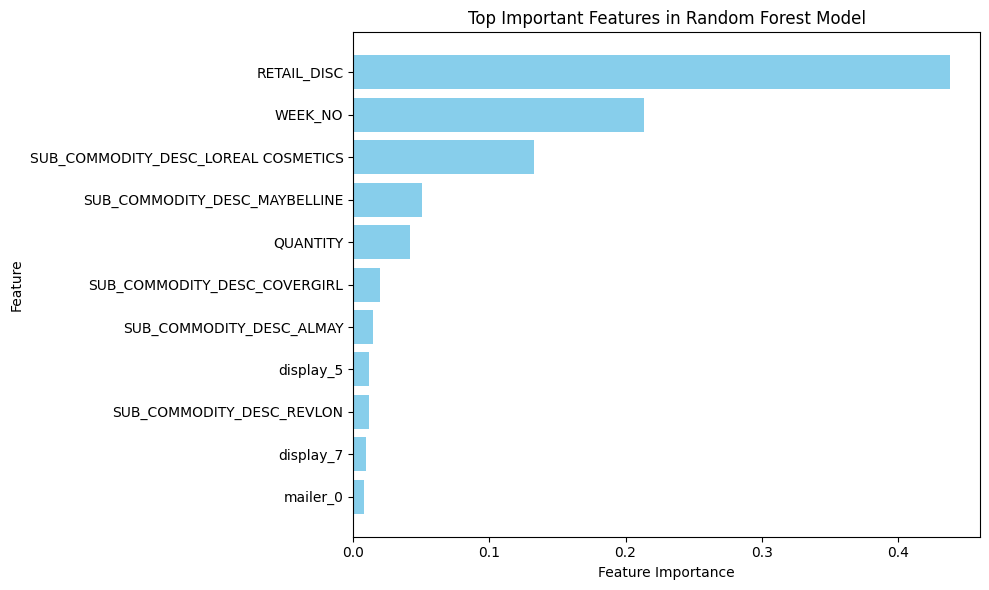

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("final_data.csv")

# List of numerical columns
numerical_columns = [
    "SALES_VALUE", "QUANTITY", "RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC",
    "TRANS_TIME", "WEEK_NO", "CURR_SIZE_OF_PRODUCT"
]

# Check if there are any non-numeric values in the numerical columns
for col in numerical_columns:
    # Display unique non-numeric values in each column
    print(f"Non-numeric values in {col}:")
    print(data[col].unique())

# Replace empty strings, "NA", "None", or any other unwanted non-numeric entries with NaN
data[numerical_columns] = data[numerical_columns].replace({
    ' ': pd.NA,           # Replace empty spaces with NaN
    'NA': pd.NA,          # Replace 'NA' with NaN
    'None': pd.NA,        # Replace 'None' with NaN
    'null': pd.NA,        # Replace 'null' with NaN
    'NaN': pd.NA,         # Replace 'NaN' (string) with NaN
    'invalid': pd.NA      # Replace 'invalid' with NaN (you can add other keywords as needed)
})

# Convert all numerical columns to numeric, coerce invalid values to NaN
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Check for any missing values after conversion
print("Missing values after conversion:")
print(data[numerical_columns].isna().sum())

# Optionally, handle NaN values by filling them with 0, mean, median, or any business rule
# Here we're filling NaN with 0, but you can also use mean/median imputation as needed
data[numerical_columns] = data[numerical_columns].fillna(0)

# Proceed with the model after cleaning data
# Define target variable and features
X = data.drop(columns=["SALES_VALUE"])
y = data["SALES_VALUE"]

# Rest of the model building code...

# Define the target variable and features
X = data.drop(columns=["SALES_VALUE"])
y = data["SALES_VALUE"]

# Identify categorical and numerical features
categorical_features = ["mailer", "display", "SUB_COMMODITY_DESC"]
numerical_features = [
    "QUANTITY", "RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC", "WEEK_NO"
    #"CURR_SIZE_OF_PRODUCT"
]

# Preprocessing for numerical data: Standard Scaling
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine transformers in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

import matplotlib.pyplot as plt
import numpy as np

# Get the fitted RandomForestRegressor from the pipeline
rf_model = model.named_steps['regressor']

# Get feature names from the preprocessor
categorical_feature_names = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
numerical_feature_names = numerical_features

# Combine feature names
all_feature_names = np.concatenate([numerical_feature_names, categorical_feature_names])

# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_n = 11  # Number of top features to display
important_features_df = feature_importance_df.head(top_n)

# Plot important features
plt.figure(figsize=(10, 6))
plt.barh(important_features_df['Feature'], important_features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Important Features in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


The random forest predicts the sales value, so the feature importance shows that how the
1.retail_disc: the amount of retail discount contributes more to the sales. It may be that consumers prefer to buy products that already have a retail discount rather than going and redempting the coupon provided to them. (This can be a good trailing story, where we first explain that it is a very important feature and then move along with other findings)
2.WEEK_NO : there is some seasonal data based on the week no we can interpret those.
3.competitors:
4.Quantity:
5.display_5: Rear End Cap
6.display_7: In-Aisle
7.mailer_0: Not on ad

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
data = pd.read_csv("final_data.csv")

print(data.head())

filtered_product = data[data['SUB_COMMODITY_DESC'].isin([ 'MAYBELLINE'])]

# Convert 'MAILER' and 'DISPLAY' to categorical variables
filtered_product['mailer'] = filtered_product['mailer'].astype('category')
filtered_product['display'] = filtered_product['display'].astype('category')

# Fit the regression model using statsmodels formula interface
# Formula specifies the dependent variable (SALES_VALUE) and the independent variables (QUANTITY, RETAIL_DISC, COUPON_DISC, WEEK_NO, MAILER, DISPLAY)
model = smf.ols('QUANTITY ~ C(mailer) + C(display)+WEEK_NO+ SALES_VALUE + RETAIL_DISC ', data=filtered_product)

# Fit the model
result = model.fit()

# Print the summary of the regression
print(result.summary())


   household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0            472  27661385727   57      850200         1         0.00   
1            472  27661385727   57     7168070         1         8.49   
2           2184  27709170627   61     5569602         1         0.00   
3           2184  27709170627   61     5569847         1         8.99   
4           2184  27709170627   61     5576160         1         0.00   

   STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  \
0       391        -7.39        1138        9          0.0                0.0   
1       391         0.00        1138        9          0.0                0.0   
2       309        -8.99        1228        9          0.0                0.0   
3       309         0.00        1228        9          0.0                0.0   
4       309        -6.99        1228        9          0.0                0.0   

   display mailer  MANUFACTURER DEPARTMENT     BRAND        COMMODITY_DESC

<ipython-input-47-beb743535045>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_product['mailer'] = filtered_product['mailer'].astype('category')
<ipython-input-47-beb743535045>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_product['display'] = filtered_product['display'].astype('category')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load datasets
products = pd.read_csv('product.csv')
demographics = pd.read_csv('hh_demographic.csv')
transactions = pd.read_csv('transaction_data.csv')
campaigns = pd.read_csv('campaign_desc.csv')
campaign_table = pd.read_csv('campaign_table.csv')

filter_product = products[products['SUB_COMMODITY_DESC'].isin([ 'MAYBELLINE'])]
# Filter transactions for the focal product
focal_transactions = transactions[transactions['PRODUCT_ID'].isin(filter_product['PRODUCT_ID'])]
#data[data['SUB_COMMODITY_DESC'].isin([ 'MAYBELLINE'])]

# Aggregate spending habits
spending = focal_transactions.groupby('household_key').agg({
    'SALES_VALUE': ['sum', 'mean', 'count'],
    'RETAIL_DISC': ['sum', 'mean'],
    'COUPON_DISC': ['sum', 'mean']
}).reset_index()
spending.columns = ['household_key', 'total_spend', 'avg_spend', 'purchase_count',
                    'total_retail_disc', 'avg_retail_disc', 'total_coupon_disc', 'avg_coupon_disc']

# Merge campaign engagement
campaign_engagement = campaign_table.groupby('household_key')['CAMPAIGN'].nunique().reset_index()
campaign_engagement.columns = ['household_key', 'campaigns_engaged']

# Merge all data
customer_data = demographics.merge(spending, on='household_key', how='left')
customer_data = customer_data.merge(campaign_engagement, on='household_key', how='left')

# Fill NAs with 0 for customers who didn't purchase the focal product
customer_data = customer_data.fillna(0)

# Select features for clustering
features = ['HOMEOWNER_DESC', 'KID_CATEGORY_DESC',
            'total_spend', 'avg_spend', 'purchase_count', 'total_retail_disc',
            'avg_retail_disc', 'total_coupon_disc', 'avg_coupon_disc', 'campaigns_engaged']

# Encode categorical variables
customer_data_encoded = pd.get_dummies(customer_data[features])

# Scale features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_encoded)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Analyze clusters
cluster_analysis = customer_data.groupby('Cluster').agg({
    'HOMEOWNER_DESC': lambda x: x.mode().iloc[0],
    'KID_CATEGORY_DESC': lambda x: x.mode().iloc[0],
    'total_spend': 'mean',
    'avg_spend': 'mean',
    'purchase_count': 'mean',
    'total_retail_disc': 'mean',
    'avg_retail_disc': 'mean',
    'total_coupon_disc': 'mean',
    'avg_coupon_disc': 'mean',
    'campaigns_engaged': 'mean'
})

print(cluster_analysis)

        HOMEOWNER_DESC KID_CATEGORY_DESC  total_spend  avg_spend  \
Cluster                                                            
0            Homeowner                 1     0.262019   0.262019   
1              Unknown      None/Unknown     0.290359   0.242265   
2            Homeowner      None/Unknown     0.201391   0.182398   
3            Homeowner      None/Unknown     9.726842   3.828481   

         purchase_count  total_retail_disc  avg_retail_disc  \
Cluster                                                       
0              0.048077           0.000000         0.000000   
1              0.080717          -0.018117        -0.018117   
2              0.052758          -0.005755        -0.003837   
3              2.596491          -3.896491        -1.714519   

         total_coupon_disc  avg_coupon_disc  campaigns_engaged  
Cluster                                                         
0                 0.000000         0.000000           5.375000  
1                

Predict the sales or market share of competitors

R2 Score: 0.8501460403832392
RMSE: 1.045484256859818
Top Important Features:
             Feature  Importance
5        RETAIL_DISC    0.369575
2           STORE_ID    0.287085
1            WEEK_NO    0.223711
0           QUANTITY    0.115918
4        COUPON_DISC    0.002925
3  COUPON_MATCH_DISC    0.000786
6        display_nan    0.000000
7         mailer_nan    0.000000


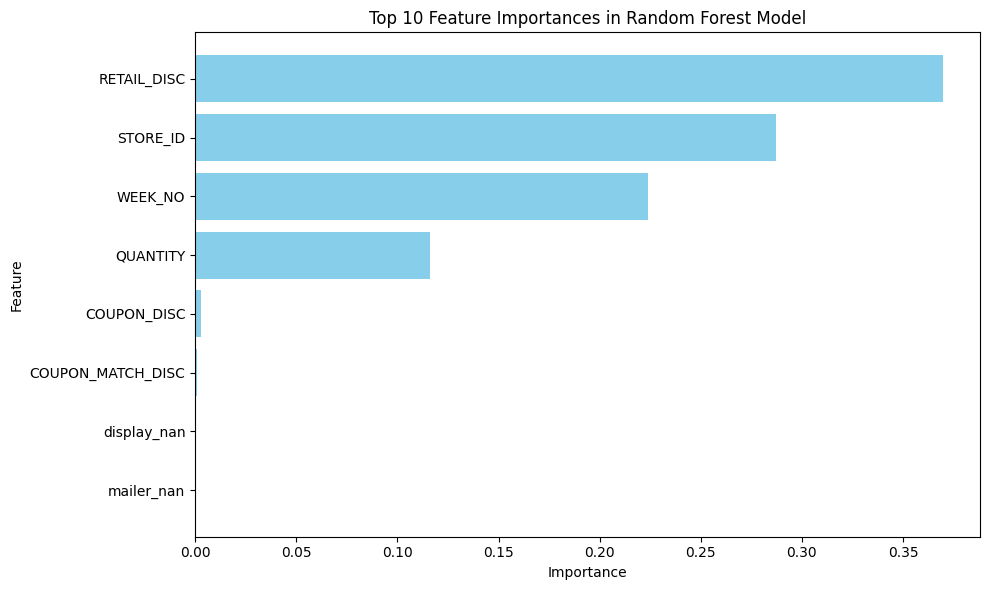

Market Share (%):
SUB_COMMODITY_DESC
COVERGIRL           32.502605
LOREAL COSMETICS    19.918870
MAYBELLINE          27.630193
REVLON              19.948333
Name: SALES_VALUE, dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load datasets (assuming CSV format)
campaign_table = pd.read_csv("campaign_table.csv")
campaign_desc = pd.read_csv("campaign_desc.csv")
transaction_data = pd.read_csv("transaction_data.csv")
hh_demographic = pd.read_csv("hh_demographic.csv")
product_data = pd.read_csv("product.csv")
coupon_data = pd.read_csv("coupon.csv")
coupon_redempt = pd.read_csv("coupon_redempt.csv")
causal_data = pd.read_csv("causal_data.csv")

# Merge relevant datasets
# Merge product details to transaction data
transaction_data = transaction_data.merge(product_data, on="PRODUCT_ID", how="left")

# Filter for competitors and focal brand
brands = ["REVLON", "COVERGIRL", "LOREAL COSMETICS", "MAYBELLINE"]
transaction_data = transaction_data[transaction_data["SUB_COMMODITY_DESC"].isin(brands)]

# Aggregate sales data by brand and week
brand_sales = (
    transaction_data.groupby(["SUB_COMMODITY_DESC", "WEEK_NO"])
    .agg({"SALES_VALUE": "sum", "QUANTITY": "sum"})
    .reset_index()
)

# Add campaign effects (merge campaign details)
campaign_effects = campaign_desc.merge(campaign_table, on="CAMPAIGN", how="left")
#print(campaign_effects.head())
#print(transaction_data.head())
transaction_data = transaction_data.merge(
    campaign_effects, on=["household_key"], how="left"
)

# Include demographic data
transaction_data = transaction_data.merge(hh_demographic, on="household_key", how="left")

# Causal effects (e.g., display/mailers)
transaction_data = transaction_data.merge(
    causal_data, on=["PRODUCT_ID", "STORE_ID", "WEEK_NO"], how="left"
)

# Feature engineering: Prepare final dataset for modeling
features = transaction_data[[
    "SALES_VALUE", "QUANTITY", "WEEK_NO", "display", "mailer","STORE_ID",
    "COUPON_MATCH_DISC", "COUPON_DISC", "RETAIL_DISC","SUB_COMMODITY_DESC"
]]
#print(transaction_data.head())
#features["BRAND"] = features["SUB_COMMODITY_DESC"]

# Encode categorical variables
categorical_cols = ["display", "mailer"]
encoder = OneHotEncoder()
encoded_cats = pd.DataFrame(
    encoder.fit_transform(features[categorical_cols]).toarray(),
    columns=encoder.get_feature_names_out(categorical_cols),
)

# Combine features
features = features.drop(categorical_cols, axis=1)
features = pd.concat([features.reset_index(drop=True), encoded_cats.reset_index(drop=True)], axis=1)
#print(features.columns)
# Define the target variable (sales for competitors)
competitor_data = features[features["SUB_COMMODITY_DESC"] != "MAYBELLINE"]


# Split into features (X) and target (y)
X = competitor_data.drop(["SALES_VALUE"], axis=1)
y = competitor_data["SALES_VALUE"]

X = X.drop(["SUB_COMMODITY_DESC"], axis=1)
# Check alignment
assert len(X) == len(y), "Mismatch in the number of samples between X and y"
# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Extract feature names from the dataset
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print top important features
print("Top Important Features:")
print(importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances in Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()



# # Market share calculation
# competitor_sales = (
#     transaction_data[transaction_data["SUB_COMMODITY_DESC"] != "MAYBELLINE"]
#     .groupby("SUB_COMMODITY_DESC")["SALES_VALUE"]
#     .sum()
# )
# total_sales = transaction_data["SALES_VALUE"].sum()
# market_share = (competitor_sales / total_sales) * 100
# print("\nMarket Share (%):\n", market_share)

# #Focal_Product Market share
# Calculate total sales by brand
brand_sales = transaction_data.groupby("SUB_COMMODITY_DESC")["SALES_VALUE"].sum()

# Calculate the total sales for all brands
total_sales = brand_sales.sum()

# Calculate the market share for each brand
market_share = (brand_sales / total_sales) * 100

# Extract the market share of MAYBELLINE
maybelline_market_share = market_share.get("MAYBELLINE", 0)

print("Market Share (%):")
print(market_share)
#print(f"\nMAYBELLINE Market Share: {maybelline_market_share:.2f}%")

Ways to increase the marketshare of maybelline

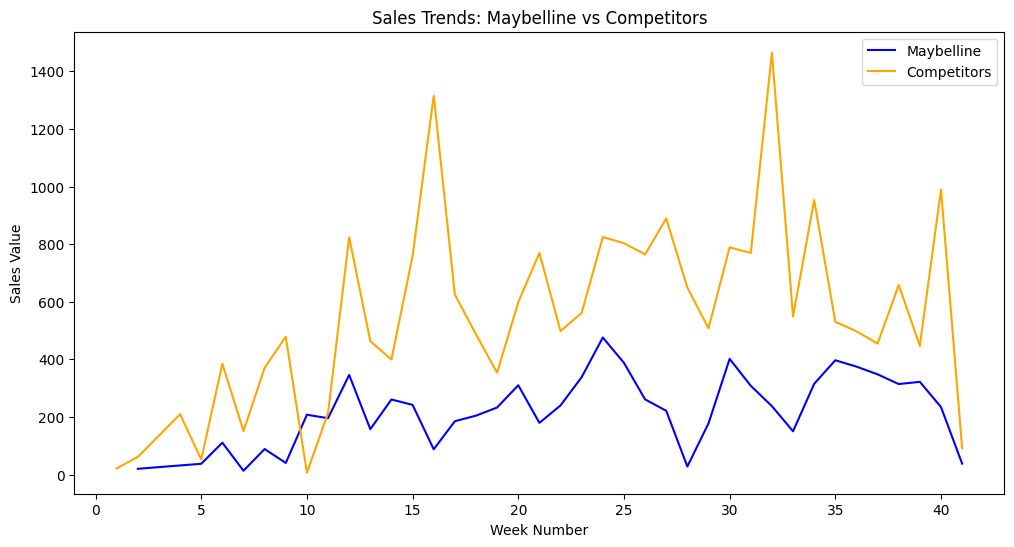

Stores where Maybelline has low market share:
SUB_COMMODITY_DESC  COVERGIRL  LOREAL COSMETICS  MAYBELLINE  REVLON  \
STORE_ID                                                              
299                     16.45            157.30        5.00     NaN   
315                     79.31            129.86       28.70  101.60   
323                    175.81            234.90       42.21   30.20   
355                       NaN             46.13        2.39     NaN   
389                     60.42               NaN       11.96  122.34   
391                    267.96            262.71       56.31   84.56   
421                    224.38             34.90       13.93     NaN   
450                     19.77            218.48       28.35   20.00   
31642                  123.56               NaN       11.96   14.52   
31742                  162.65             63.92       36.77  166.19   

SUB_COMMODITY_DESC  Market Share (%)  
STORE_ID                              
299                    

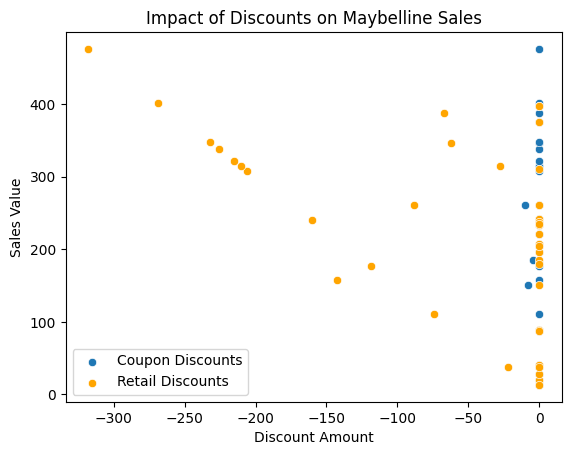

Top 10 Products Contributing to Maybelline Sales:
PRODUCT_ID
1114906    282.97
1079574    191.91
6039732    164.73
9526965    149.10
1129094    143.19
961497     141.34
885422     133.22
987526     108.94
916441     107.32
7441415    106.83
Name: SALES_VALUE, dtype: float64
Competitor Performance (Total Sales):
SUB_COMMODITY_DESC
COVERGIRL           9983.50
LOREAL COSMETICS    6118.28
REVLON              6127.33
Name: SALES_VALUE, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze sales trends for MAYBELLINE vs competitors
maybelline_data = transaction_data[transaction_data["SUB_COMMODITY_DESC"] == "MAYBELLINE"]
competitor_data = transaction_data[
    transaction_data["SUB_COMMODITY_DESC"].isin(["REVLON", "COVERGIRL", "LOREAL COSMETICS"])
]

# Aggregate sales data by week
maybelline_weekly_sales = maybelline_data.groupby("WEEK_NO")["SALES_VALUE"].sum().reset_index()
competitor_weekly_sales = competitor_data.groupby("WEEK_NO")["SALES_VALUE"].sum().reset_index()

# Plot sales trends
plt.figure(figsize=(12, 6))
plt.plot(maybelline_weekly_sales["WEEK_NO"], maybelline_weekly_sales["SALES_VALUE"], label="Maybelline", color="blue")
plt.plot(competitor_weekly_sales["WEEK_NO"], competitor_weekly_sales["SALES_VALUE"], label="Competitors", color="orange")
plt.title("Sales Trends: Maybelline vs Competitors")
plt.xlabel("Week Number")
plt.ylabel("Sales Value")
plt.legend()
plt.show()

# Identify stores where Maybelline has low sales
store_sales = transaction_data.groupby(["STORE_ID", "SUB_COMMODITY_DESC"])["SALES_VALUE"].sum().unstack()
store_sales["Market Share (%)"] = (store_sales["MAYBELLINE"] / store_sales.sum(axis=1)) * 100
low_performance_stores = store_sales[store_sales["Market Share (%)"] < 10]

print("Stores where Maybelline has low market share:")
print(low_performance_stores)

# Analyze impact of discounts and promotions on sales
discount_impact = maybelline_data.groupby("WEEK_NO")[["COUPON_DISC", "RETAIL_DISC", "SALES_VALUE"]].sum()
sns.scatterplot(data=discount_impact, x="COUPON_DISC", y="SALES_VALUE", label="Coupon Discounts")
sns.scatterplot(data=discount_impact, x="RETAIL_DISC", y="SALES_VALUE", label="Retail Discounts", color="orange")
plt.title("Impact of Discounts on Maybelline Sales")
plt.xlabel("Discount Amount")
plt.ylabel("Sales Value")
plt.legend()
plt.show()

# Analyze product-level performance
product_performance = maybelline_data.groupby("PRODUCT_ID")["SALES_VALUE"].sum().sort_values(ascending=False)
top_products = product_performance.head(10)
print("Top 10 Products Contributing to Maybelline Sales:")
print(top_products)

# Analyze competitor product performance
competitor_performance = competitor_data.groupby("SUB_COMMODITY_DESC")["SALES_VALUE"].sum()
print("Competitor Performance (Total Sales):")
print(competitor_performance)


How the discounts contribute tot he top performing products sales for Focal brand and the competitors

Maybelline Discount Analysis (Top Products):
            COUPON_DISC  RETAIL_DISC  SALES_VALUE
PRODUCT_ID                                       
885422         0.000000    -0.563158     3.505789
916441         0.000000    -1.024000     5.366000
961497         0.000000    -0.553846     5.436154
987526         0.000000    -2.800000     4.190000
1079574        0.000000    -1.273469     3.916531
1114906        0.000000    -1.356923     4.353385
1129094       -0.387097     0.000000     4.619032
6039732        0.000000    -0.700800     6.589200
7441415        0.000000    -0.645217     4.644783
9526965        0.000000    -0.640000     3.550000

Competitor Discount Analysis (Top Products):
            COUPON_DISC  RETAIL_DISC  SALES_VALUE
PRODUCT_ID                                       
899711              0.0     0.000000     8.376923
974723              0.0    -0.518519     4.471481
1001464             0.0    -1.454545     8.535455
1097158             0.0    -1.533636    10.506364
1131887  

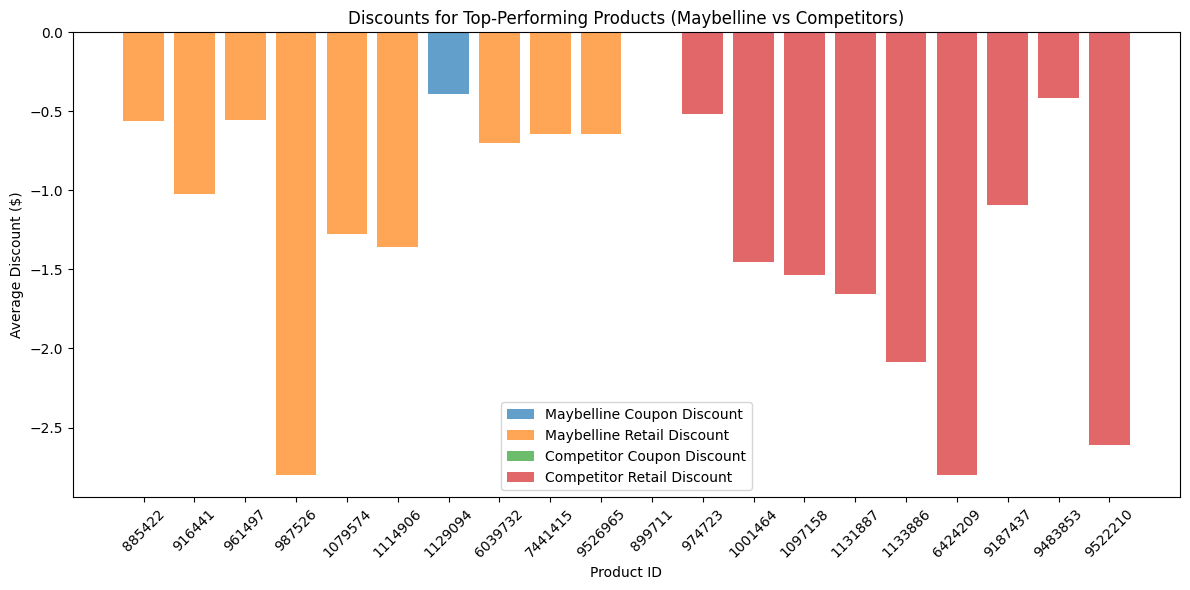

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify top-performing Maybelline products
maybelline_data = transaction_data[transaction_data["SUB_COMMODITY_DESC"] == "MAYBELLINE"]
top_maybelline_products = (
    maybelline_data.groupby("PRODUCT_ID")["SALES_VALUE"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Identify top-performing competitor products
competitor_data = transaction_data[
    transaction_data["SUB_COMMODITY_DESC"].isin(["REVLON", "COVERGIRL", "LOREAL COSMETICS"])
]
top_competitor_products = (
    competitor_data.groupby("PRODUCT_ID")["SALES_VALUE"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Extract discount data for top-performing Maybelline products
maybelline_discount_analysis = maybelline_data[
    maybelline_data["PRODUCT_ID"].isin(top_maybelline_products)
].groupby("PRODUCT_ID")[["COUPON_DISC", "RETAIL_DISC", "SALES_VALUE"]].mean()

# Extract discount data for top-performing competitor products
competitor_discount_analysis = competitor_data[
    competitor_data["PRODUCT_ID"].isin(top_competitor_products)
].groupby("PRODUCT_ID")[["COUPON_DISC", "RETAIL_DISC", "SALES_VALUE"]].mean()

# Combine and display results
print("Maybelline Discount Analysis (Top Products):")
print(maybelline_discount_analysis)

print("\nCompetitor Discount Analysis (Top Products):")
print(competitor_discount_analysis)

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot Maybelline discounts
plt.bar(
    maybelline_discount_analysis.index.astype(str),
    maybelline_discount_analysis["COUPON_DISC"],
    label="Maybelline Coupon Discount",
    alpha=0.7,
)
plt.bar(
    maybelline_discount_analysis.index.astype(str),
    maybelline_discount_analysis["RETAIL_DISC"],
    bottom=maybelline_discount_analysis["COUPON_DISC"],
    label="Maybelline Retail Discount",
    alpha=0.7,
)

# Plot Competitor discounts
plt.bar(
    competitor_discount_analysis.index.astype(str),
    competitor_discount_analysis["COUPON_DISC"],
    label="Competitor Coupon Discount",
    alpha=0.7,
)
plt.bar(
    competitor_discount_analysis.index.astype(str),
    competitor_discount_analysis["RETAIL_DISC"],
    bottom=competitor_discount_analysis["COUPON_DISC"],
    label="Competitor Retail Discount",
    alpha=0.7,
)

plt.title("Discounts for Top-Performing Products (Maybelline vs Competitors)")
plt.xlabel("Product ID")
plt.ylabel("Average Discount ($)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Forecast competitors’ pricing strategies and examine how these pricing changes may impact on
the sales of the focal brand

Step 1: Analyze Historical Pricing Data for Competitors

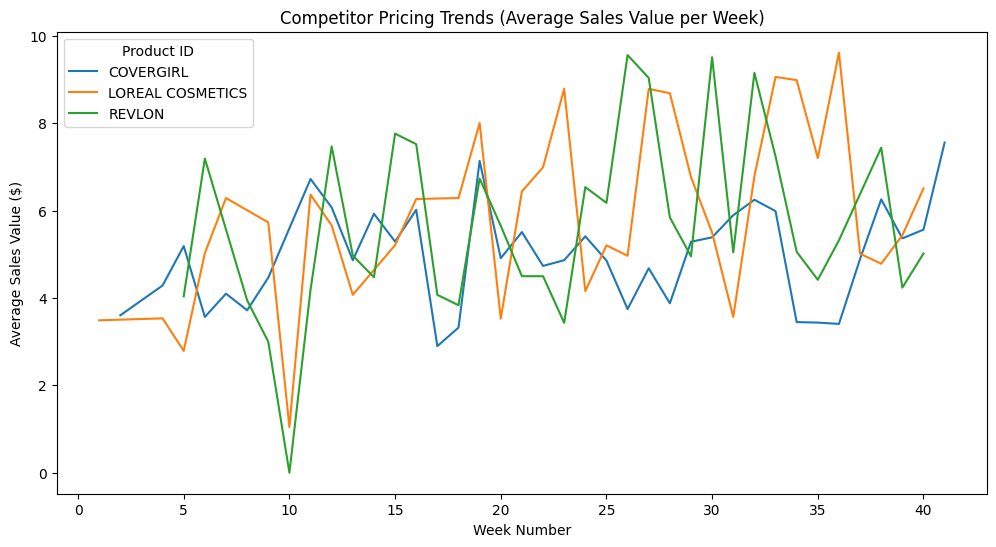

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the relevant data (competitor products and their prices)
competitor_data = transaction_data[
    transaction_data["SUB_COMMODITY_DESC"].isin(["REVLON", "COVERGIRL", "LOREAL COSMETICS"])
]

# Group by product_id and week to analyze pricing trends
competitor_pricing = competitor_data.groupby(["SUB_COMMODITY_DESC", "WEEK_NO"])[["SALES_VALUE"]].mean().reset_index()

# Plot competitor pricing trends (average sales value per week)
plt.figure(figsize=(12, 6))
sns.lineplot(data=competitor_pricing, x="WEEK_NO", y="SALES_VALUE", hue="SUB_COMMODITY_DESC")
plt.title("Competitor Pricing Trends (Average Sales Value per Week)")
plt.xlabel("Week Number")
plt.ylabel("Average Sales Value ($)")
plt.legend(title="Product ID")
plt.show()


Step 2: Forecast Competitors' Pricing Using Time Series

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

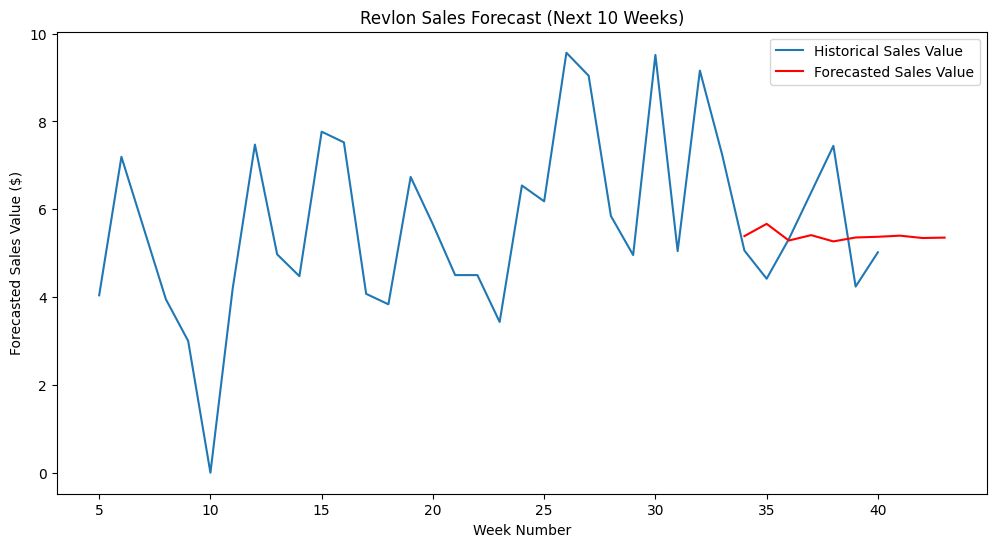

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

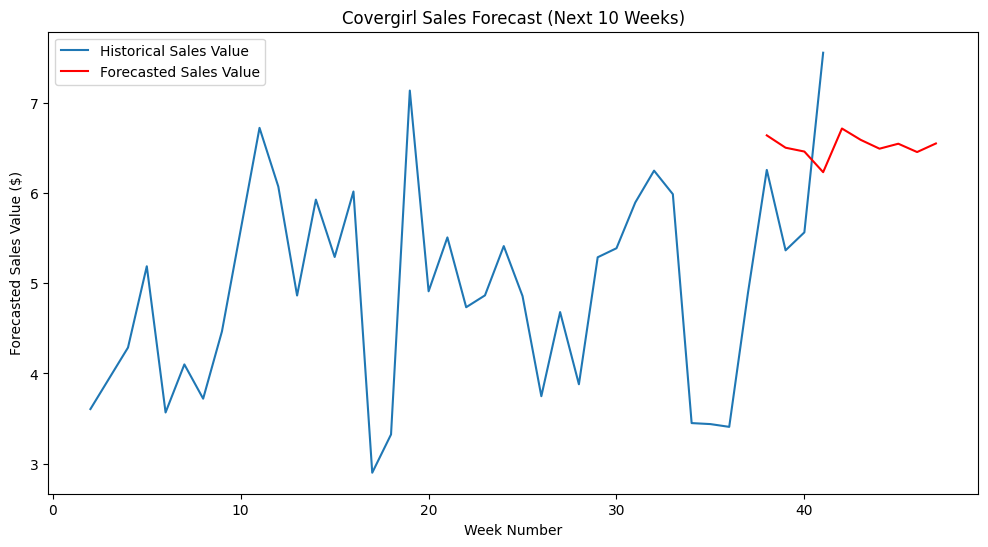

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

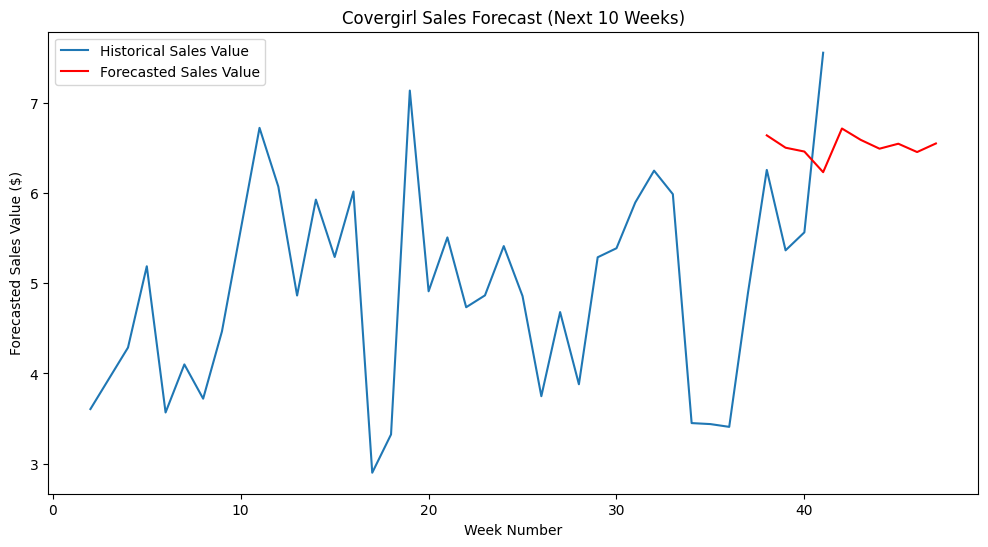

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Let's forecast for one of the competitor products, say REVLON
revlon_data = competitor_data[competitor_data["SUB_COMMODITY_DESC"] == "REVLON"]

# Aggregate sales value by week for Revlon (as a proxy for pricing)
revlon_weekly_sales = revlon_data.groupby("WEEK_NO")["SALES_VALUE"].mean()

# Fit ARIMA model to forecast future prices
model = ARIMA(revlon_weekly_sales, order=(5, 1, 0))  # Adjust parameters based on ACF/PACF plots
model_fit = model.fit()

# Forecast next 10 weeks
forecast = model_fit.forecast(steps=10)
forecast_index = list(range(len(revlon_weekly_sales), len(revlon_weekly_sales) + 10))

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(revlon_weekly_sales.index, revlon_weekly_sales, label="Historical Sales Value")
plt.plot(forecast_index, forecast, label="Forecasted Sales Value", color='red')
plt.title("Revlon Sales Forecast (Next 10 Weeks)")
plt.xlabel("Week Number")
plt.ylabel("Forecasted Sales Value ($)")
plt.legend()
plt.show()

# Let's forecast for one of the competitor products, say COVERGIRL
covergirl_data = competitor_data[competitor_data["SUB_COMMODITY_DESC"] == "COVERGIRL"]

# Aggregate sales value by week for Revlon (as a proxy for pricing)
covergirl_weekly_sales = covergirl_data.groupby("WEEK_NO")["SALES_VALUE"].mean()

# Fit ARIMA model to forecast future prices
model = ARIMA(covergirl_weekly_sales, order=(5, 1, 0))  # Adjust parameters based on ACF/PACF plots
model_fit = model.fit()

# Forecast next 10 weeks
forecast = model_fit.forecast(steps=10)
forecast_index = list(range(len(covergirl_weekly_sales), len(covergirl_weekly_sales) + 10))

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(covergirl_weekly_sales.index, covergirl_weekly_sales, label="Historical Sales Value")
plt.plot(forecast_index, forecast, label="Forecasted Sales Value", color='red')
plt.title("Covergirl Sales Forecast (Next 10 Weeks)")
plt.xlabel("Week Number")
plt.ylabel("Forecasted Sales Value ($)")
plt.legend()
plt.show()

# Let's forecast for one of the competitor products, say COVERGIRL
Loreal_data = competitor_data[competitor_data["SUB_COMMODITY_DESC"] == "LOREAL COSMETICS"]

# Aggregate sales value by week for Revlon (as a proxy for pricing)
covergirl_weekly_sales = covergirl_data.groupby("WEEK_NO")["SALES_VALUE"].mean()

# Fit ARIMA model to forecast future prices
model = ARIMA(covergirl_weekly_sales, order=(5, 1, 0))  # Adjust parameters based on ACF/PACF plots
model_fit = model.fit()

# Forecast next 10 weeks
forecast = model_fit.forecast(steps=10)
forecast_index = list(range(len(covergirl_weekly_sales), len(covergirl_weekly_sales) + 10))

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(covergirl_weekly_sales.index, covergirl_weekly_sales, label="Historical Sales Value")
plt.plot(forecast_index, forecast, label="Forecasted Sales Value", color='red')
plt.title("Covergirl Sales Forecast (Next 10 Weeks)")
plt.xlabel("Week Number")
plt.ylabel("Forecasted Sales Value ($)")
plt.legend()
plt.show()


Correlation Analysis - Competitor Pricing and Maybelline Sales

In [ ]:
# Filter Maybelline data
maybelline_data = transaction_data[transaction_data["SUB_COMMODITY_DESC"] == "MAYBELLINE"]

# Aggregate sales value by week for Maybelline
maybelline_weekly_sales = maybelline_data.groupby("WEEK_NO")["SALES_VALUE"].sum()

# Merge Maybelline and competitors' data by week for comparison
weekly_sales = pd.merge(maybelline_weekly_sales, competitor_pricing.groupby("WEEK_NO")["SALES_VALUE"].sum(), on="WEEK_NO", suffixes=("_MAYBELLINE", "_COMPETITORS"))

# Calculate correlation
correlation = weekly_sales["SALES_VALUE_MAYBELLINE"].corr(weekly_sales["SALES_VALUE_COMPETITORS"])

print(f"Correlation between Maybelline's sales and Competitors' sales: {correlation:.2f}")


Correlation between Maybelline's sales and Competitors' sales: 0.34


Simulate Impact of Competitor Pricing on Maybelline's Sales

In [ ]:
# Simulate 10% increase in competitor pricing
price_increase_factor = 1.1
simulated_competitor_sales = weekly_sales["SALES_VALUE_COMPETITORS"] * price_increase_factor

# Predict the impact on Maybelline's sales using the correlation
simulated_maybelline_sales = weekly_sales["SALES_VALUE_MAYBELLINE"] + correlation * (simulated_competitor_sales - weekly_sales["SALES_VALUE_COMPETITORS"])
print(weekly_sales.head())
# Plot the original vs simulated sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales["WEEK_NO"], weekly_sales["SALES_VALUE_MAYBELLINE"], label="Original Maybelline Sales")
plt.plot(weekly_sales["WEEK_NO"], simulated_maybelline_sales, label="Simulated Maybelline Sales (10% Competitor Price Increase)", color="red")
plt.title("Simulated Impact of Competitor Pricing on Maybelline Sales")
plt.xlabel("Week Number")
plt.ylabel("Sales Value ($)")
plt.legend()
plt.show()


         SALES_VALUE_MAYBELLINE  SALES_VALUE_COMPETITORS
WEEK_NO                                                 
2                         19.90                 3.604706
5                         37.31                12.020000
6                        110.66                15.790975
7                         13.17                10.390385
8                         88.53                 7.667831


KeyError: 'WEEK_NO'

<Figure size 1200x600 with 0 Axes>

Using the above description of the data form clusters based on the age of the customers who buy the focal brand and the competitor brand.

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'MANUFACTURER', 'DEPARTMENT',
       'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT',
       'DESCRIPTION_x', 'CAMPAIGN', 'START_DAY', 'END_DAY', 'DESCRIPTION_y',
       'classification_1', 'classification_2', 'classification_3',
       'HOMEOWNER_DESC', 'classification_5', 'classification_4',
       'KID_CATEGORY_DESC', 'display', 'mailer', 'coupon_disc_category'],
      dtype='object')
   classification_1  AGE_encoded
6        Age Group2            1
7        Age Group2            1
8        Age Group2            1
9        Age Group2            1
10       Age Group2            1
    household_key classification_1  SALES_VALUE  Cluster
6            2058       Age Group2         4.94        2
7            2058       Age Group2         4.94        2
8            2058       Age G

<ipython-input-69-2a0ffe5a64f0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focal_and_competitor_data.dropna(subset=['classification_1'], inplace=True)


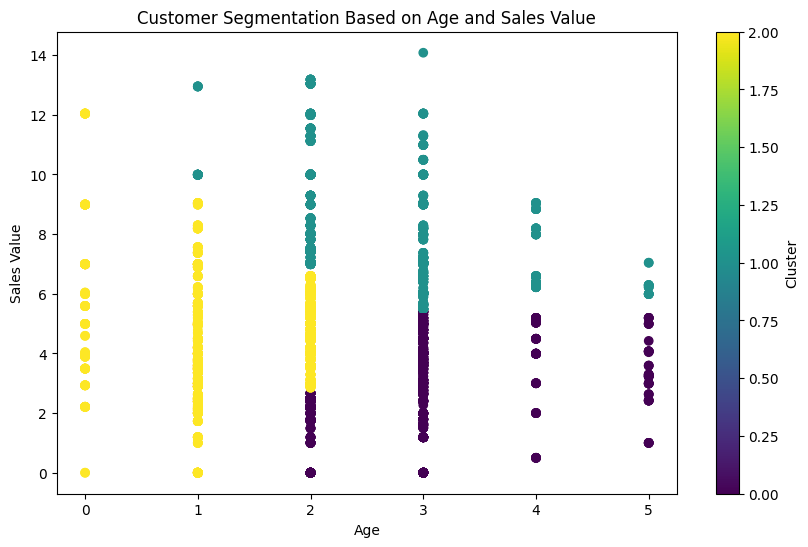

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

print(transaction_data.columns)

# Create a new column 'coupon_disc_category'
transaction_data['coupon_disc_category'] = transaction_data['COUPON_DISC'].apply(lambda x: 1 if x > 0 else 0)

focal_and_competitor_data = transaction_data[['household_key', 'SUB_COMMODITY_DESC', 'SALES_VALUE', 'classification_1', 'BASKET_ID','coupon_disc_category']]

# Handle missing or incorrect values (if any)
focal_and_competitor_data.dropna(subset=['classification_1'], inplace=True)

# Filter customers who purchased Maybelline and competitors
customer_data = focal_and_competitor_data[focal_and_competitor_data['SUB_COMMODITY_DESC'].isin(['MAYBELLINE', 'REVLON', 'COVERGIRL', 'LOREAL COSMETICS'])]

label_encoder = LabelEncoder()
customer_data['AGE_encoded'] = label_encoder.fit_transform(customer_data['classification_1'])

# Now the 'AGE_encoded' column is numerical
print(customer_data[['classification_1', 'AGE_encoded']].head())
# Prepare the features for clustering (here we use 'AGE' for segmentation)
age_data = customer_data[['AGE_encoded', 'SALES_VALUE']]

# Standardize the data (important for clustering algorithms like KMeans)
scaler = StandardScaler()
age_data_scaled = scaler.fit_transform(age_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters as needed
customer_data['Cluster'] = kmeans.fit_predict(age_data_scaled)

# Display the clustered data
print(customer_data[['household_key', 'classification_1', 'SALES_VALUE', 'Cluster']].head())

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(customer_data['AGE_encoded'], customer_data['SALES_VALUE'], c=customer_data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation Based on Age and Sales Value')
plt.xlabel('Age')
plt.ylabel('Sales Value')
plt.colorbar(label='Cluster')
plt.show()






In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load datasets
products = pd.read_csv('product.csv')
demographics = pd.read_csv('hh_demographic.csv')
transactions = pd.read_csv('transaction_data.csv')
campaigns = pd.read_csv('campaign_desc.csv')
campaign_table = pd.read_csv('campaign_table.csv')

product_id = products[(products['SUB_COMMODITY_DESC'].isin(['MAYBELLINE']))]
# Filter transactions for the focal product
focal_transactions = transactions[(transactions['PRODUCT_ID'].isin(product_id))]

print(focal_transactions.head())
# Aggregate spending habits
spending = focal_transactions.groupby('household_key').agg({
    'SALES_VALUE': ['sum', 'mean', 'count'],
    'RETAIL_DISC': ['sum', 'mean'],
    'COUPON_DISC': ['sum', 'mean']
}).reset_index()
spending.columns = ['household_key', 'total_spend', 'avg_spend', 'purchase_count',
                    'total_retail_disc', 'avg_retail_disc', 'total_coupon_disc', 'avg_coupon_disc']

# Merge campaign engagement
campaign_engagement = campaign_table.groupby('household_key')['CAMPAIGN'].nunique().reset_index()
campaign_engagement.columns = ['household_key', 'campaigns_engaged']

# Merge all data
customer_data = demographics.merge(spending, on='household_key', how='left')
customer_data = customer_data.merge(campaign_engagement, on='household_key', how='left')

# Fill NAs with 0 for customers who didn't purchase the focal product
customer_data = customer_data.fillna(0)

# Select features for clustering
features = ['HOMEOWNER_DESC', 'KID_CATEGORY_DESC',
            'total_spend', 'avg_spend', 'purchase_count', 'total_retail_disc',
            'avg_retail_disc', 'total_coupon_disc', 'avg_coupon_disc', 'campaigns_engaged']

# Encode categorical variables
customer_data_encoded = pd.get_dummies(customer_data[features])

# Scale features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_encoded)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Analyze clusters
cluster_analysis = customer_data.groupby('Cluster').agg({
    'HOMEOWNER_DESC': lambda x: x.mode().iloc[0],
    'KID_CATEGORY_DESC': lambda x: x.mode().iloc[0],
    'total_spend': 'mean',
    'avg_spend': 'mean',
    'purchase_count': 'mean',
    'total_retail_disc': 'mean',
    'avg_retail_disc': 'mean',
    'total_coupon_disc': 'mean',
    'avg_coupon_disc': 'mean',
    'campaigns_engaged': 'mean'
})

print(cluster_analysis)

Empty DataFrame
Columns: [household_key, BASKET_ID, DAY, PRODUCT_ID, QUANTITY, SALES_VALUE, STORE_ID, RETAIL_DISC, TRANS_TIME, WEEK_NO, COUPON_DISC, COUPON_MATCH_DISC]
Index: []
          HOMEOWNER_DESC KID_CATEGORY_DESC  total_spend  avg_spend  \
Cluster                                                              
0              Homeowner                 1          0.0        0.0   
1              Homeowner      None/Unknown          0.0        0.0   
2                Unknown      None/Unknown          0.0        0.0   
3              Homeowner                 2          0.0        0.0   
4        Probable Renter      None/Unknown          0.0        0.0   

         purchase_count  total_retail_disc  avg_retail_disc  \
Cluster                                                       
0                   0.0                0.0              0.0   
1                   0.0                0.0              0.0   
2                   0.0                0.0              0.0   
3               

Logit model to see if a household responds to particular campaign

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load datasets (assuming CSV format)
campaign_table = pd.read_csv("campaign_table.csv")
campaign_desc = pd.read_csv("campaign_desc.csv")
transaction_data = pd.read_csv("transaction_data.csv")
hh_demographics = pd.read_csv("hh_demographic.csv")
coupon_redempt = pd.read_csv("coupon_redempt.csv")

# Merge campaign details with coupon redemption data
campaign_data = pd.merge(coupon_redempt, campaign_desc, on="CAMPAIGN", how="left")

# Merge campaign data with demographics
merged_data = pd.merge(campaign_data, hh_demographics, on="household_key", how="left")

# Create the target variable (1 if household responded, 0 otherwise)
merged_data["responded"] = 1
non_response_data = campaign_table[~campaign_table["household_key"].isin(merged_data["household_key"])]
non_response_data["responded"] = 0

# Combine response and non-response data
data = pd.concat([merged_data, non_response_data], ignore_index=True)

# Merge transaction data to calculate features like sales and discount behavior
data = pd.merge(data, transaction_data, on="household_key", how="left")

# Feature Engineering
data["total_sales"] = data.groupby("household_key")["SALES_VALUE"].transform("sum")
data["total_coupons"] = data.groupby("household_key")["COUPON_DISC"].transform("sum")
data["avg_discount"] = data.groupby("household_key")["RETAIL_DISC"].transform("mean")
data["campaign_duration"] = (pd.to_datetime(data["END_DAY"]) - pd.to_datetime(data["START_DAY"])).dt.days

# Fill missing values with 0 for numerical and 'Unknown' for categorical
data.fillna({"total_sales": 0, "total_coupons": 0, "avg_discount": 0, "classification_1": "Unknown","campaign_duration": 0}, inplace=True)

# Encode categorical features
categorical_features = ["classification_1"]
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[categorical_features]).toarray()

# Combine numerical and encoded features
numerical_features = ["total_sales", "total_coupons", "avg_discount", "campaign_duration"]
X = np.hstack((data[numerical_features], encoded_features))
y = data["responded"]

# Standardize the numerical features
scaler = StandardScaler()
X[:, :len(numerical_features)] = scaler.fit_transform(X[:, :len(numerical_features)])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
# Convert X_test to a DataFrame if it's not already
X_test_df = pd.DataFrame(X_test, columns=numerical_features + list(encoder.get_feature_names_out(categorical_features)))

# # Add the predicted probability as a new variable 'pred_resp_prob' in the DataFrame
# X_test_df['pred_resp_prob'] = y_pred_prob
# X_test_df['responded'] = y_test

# # Calculate the mean of 'pred_resp_prob' for observations with responded = 0
# mean_pred_prob_0 = X_test_df[X_test_df['responded'] == 0]['pred_resp_prob'].mean()

# # Calculate the mean of 'pred_resp_prob' for observations with responded = 1
# mean_pred_prob_1 = X_test_df[X_test_df['responded'] == 1]['pred_resp_prob'].mean()

# # Print the results
# print(f"Mean predicted probability for responded = 0: {mean_pred_prob_0:.4f}")
# print(f"Mean predicted probability for responded = 1: {mean_pred_prob_1:.4f}")

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob):.2f}")


<ipython-input-70-657f04ef05ac>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_response_data["responded"] = 0


              precision    recall  f1-score   support

           0       0.91      1.00      0.95    728763
           1       1.00      0.87      0.93    528920

    accuracy                           0.94   1257683
   macro avg       0.96      0.93      0.94   1257683
weighted avg       0.95      0.94      0.94   1257683

ROC-AUC Score: 0.95


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already calculated and added the predicted probability 'pred_resp_prob' to your DataFrame
# and that you have the variable 'X_test_df' which includes the actual 'responded' values

# Create deciles based on predicted probability in reverse order (from decile 1 to 10)
X_test_df['decile'] = pd.qcut(X_test_df['pred_resp_prob'], 10, labels=False, precision=0) + 1
X_test_df['decile'] = 10 - X_test_df['decile']  # Reverse the order, so decile 1 has highest predicted probability

# Calculate the response rate (conversion rate) for each decile
decile_summary = X_test_df.groupby('decile')['responded'].agg(['count', 'sum'])

# Calculate the lift for each decile
decile_summary['response_rate'] = decile_summary['sum'] / decile_summary['count']
overall_response_rate = X_test_df['responded'].mean()  # Overall response rate
decile_summary['lift'] = decile_summary['response_rate'] / overall_response_rate

# Plot Decile Lift Chart
plt.figure(figsize=(10, 6))
plt.plot(decile_summary.index, decile_summary['lift'], marker='o', color='b', label="Lift")
plt.xlabel('Decile', fontsize=12)
plt.ylabel('Lift', fontsize=12)
plt.title('Decile Lift Chart', fontsize=14)
plt.xticks(decile_summary.index)  # Set x-ticks to be the decile numbers
plt.grid(True)
plt.show()

# Optionally, print the decile summary to check the results
print(decile_summary)
